# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель работы:**
* Посчитать суммарные продажи во всех регионах 
* Изучить информацию о выпуске игр в разные годы 
* Изучить динамику продаж по платформам
* Выявить потенциально прибыльные платформы 
* Изучить влияние отзывов на продажи внутри одной популярной платформы
* Изучить распределение игр по жанрам и выявить прибыльные жанры
* Составить портрет пользователя каждого региона
* Проверить гипотезу: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Проверить гипотезу: Средние пользовательские рейтинги жанров Action и Sports разные

**План работы:**
* Изучить общую информацию
* Провести предобработку данных
* Провести исследовательский анализ данных
* Составить портрет пользователя каждого региона
* Проверить гипотезы
* Сделать общий вывод

**Описание данных:**

games.csv:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

#### Шаг 1. Загрузка данных

In [2]:
games = pd.read_csv("/datasets/games.csv")

In [3]:
display(games.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**При изучении общей информации были выявлены следующие проблемы:**
* Названия столбцов нужно привести к змеиному регистру
* Присутствуют пропущенные значения в name, year_of_release, genre, critic_score, user_score и rating
* user_score и year_of_release содержат неправильный тип данных

#### Шаг 2. Предобработка данных


In [5]:
games.columns = games.columns.str.lower()

In [6]:
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Названия столбцов были приведены в корректный формат**

In [7]:
print(games.isna().sum().sort_values())

platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
year_of_release     269
user_score         6701
rating             6766
critic_score       8578
dtype: int64


**Пропуски были найдены в 6 столбцах данных**

In [8]:
display(games.loc[games["name"].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
print(games["genre"].isna().sum())

2


In [10]:
games = games.dropna(subset=["name"])

In [11]:
print(games.isna().sum().sort_values())

name                  0
platform              0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
year_of_release     269
user_score         6699
rating             6764
critic_score       8576
dtype: int64


**Пропуски в name и genre находятся на одинаковых строчках данных. Не существует логичной замены пропущенным названиям игр, поэтому было принято решение удалить эти данные.**


**Доля удаленных данных: 0.012%**

In [12]:
display(games.loc[games["year_of_release"].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
print(games.loc[games["year_of_release"].isna(), "name"].unique())

['Madden NFL 2004' 'FIFA Soccer 2004' 'LEGO Batman: The Videogame'
 'wwe Smackdown vs. Raw 2006' 'Space Invaders' 'Rock Band'
 "Frogger's Adventures: Temple of the Frog"
 'LEGO Indiana Jones: The Original Adventures' 'Call of Duty 3'
 'Call of Duty: Black Ops' 'Triple Play 99' 'Adventure' 'Combat'
 'LEGO Harry Potter: Years 5-7' 'NASCAR Thunder 2003'
 'Hitman 2: Silent Assassin' 'Legacy of Kain: Soul Reaver'
 'Donkey Kong Land III' 'Air-Sea Battle' 'Suikoden III' 'Wheel of Fortune'
 'Yakuza 4' 'Namco Museum' 'Rhythm Heaven'
 'The Lord of the Rings: War in the North' 'Madden NFL 07'
 'MLB SlugFest 20-03' 'Shaun White Snowboarding'
 'PES 2009: Pro Evolution Soccer' 'WarioWare: Twisted!' 'Madden NFL 11'
 'Test Drive Unlimited 2'
 'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe'
 'Monster Hunter 2' 'Metal Gear Solid 2: Substance'
 'Advance Wars: Days of Ruin' 'The Golden Compass' 'Madden NFL 06'
 'NASCAR: Dirt to Daytona' 'Madden NFL 2002' 'Def Jam: Fight for NY'
 'NBA Stre

In [14]:
games = games.dropna(subset=["year_of_release"])

In [15]:
print(games.isna().sum().sort_values())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
user_score         6605
rating             6676
critic_score       8461
dtype: int64


In [16]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


**В строчках с пропусками в годе релиза было выявлено, что в названии игр присутствует соответствующая дата. Тем не менее, при изучении всей информации о пропусках доля таких значений крайне мала. По причине того, что не существует логичной замены пропущенным датам, легче всего удалить эти данные из датасета.**

**Доля удаленных данных: 1.6%**

In [17]:
display(games.loc[games["critic_score"].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [18]:
print(games["critic_score"].unique())

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]


In [19]:
display(games.loc[games["user_score"].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [20]:
print(games["user_score"].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [21]:
print(games.loc[(games["user_score"] == "tbd") & (games["critic_score"].isna()), "name"].count())

1320


In [22]:
games["user_score"] = games["user_score"].replace("tbd", np.NAN)

**В столбце данных user_score были найдены значения tbd, что означает to be determined. Эти значения можно заменить nan, так как они по своей сущности также являются пропусками.**

In [23]:
games["user_score"] = games["user_score"].fillna(101)

In [24]:
games["critic_score"] = games["critic_score"].fillna(101)

In [25]:
print(games.isna().sum().sort_values())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64


**Пропуски в user_score и сritic_score было решено оставить и заменить заглушкой 101, так как их доля составляет около 60% всех данных и удалить такое количество данных непозволительно.**

In [26]:
display(games.loc[games["rating"].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,101.0,101,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,101.0,101,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,101.0,101,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,101.0,101,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,101.0,101,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,101.0,101,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,101.0,101,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,101.0,101,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,101.0,101,NaN


In [27]:
print(games["rating"].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [28]:
games["rating"] = games["rating"].fillna("no")

In [29]:
print(games.isna().sum().sort_values())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


**Пропуски в rating были заменены заглушкой "no", так как не существует логичной замены пропусков, а удалить такое количество даннных непозволительно.**

**Возможные причины пропусков:**
* Данные могли быть утеряны из-за человеческого фактора
* Данные могли исказится или удалены в ходе их сбора, обработки, переноса и других процессов, так как невозможно, чтобы отсутствовали рейтинги и оценки к таким популярным играм как: Tetris, Pokemon Red/Pokemon Blue и Super Mario Bros.
* Пропуски в рейтинге и оценках могли быть из-за того, что они еще не вышли для конкретных игр. Например: to be determined в user_score

* user_score и year_of_release содержат неправильный тип данных

In [30]:
games["year_of_release"] = games["year_of_release"].astype(int)

In [31]:
games["critic_score"] = games["critic_score"].astype(int)

In [32]:
games["user_score"] = games["user_score"].astype(float)

In [33]:
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,101,101.0,no
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,101,101.0,no


In [34]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


**В ходе заполнения пропусков было обнаружено, что сritic_score содержит только целые значения, поэтому тип данных был заменен на int. В случае user_score тип данных был изменен с object на float, так как tbd был заменен на nan. Наконец тип year_of_release был заменен на int, так как содержал в себе информацию о годах.**

In [35]:
print(games.duplicated().sum())

0


**В датасете явные дубликаты отсутствовали.**

In [36]:
print(games.duplicated(subset=["name", "year_of_release", "platform", "genre"]).sum())

1


In [37]:
print(games.loc[games.duplicated(subset=["name", "year_of_release", "platform", "genre"])])

                name platform  year_of_release   genre  na_sales  eu_sales  \
16230  Madden NFL 13      PS3             2012  Sports       0.0      0.01   

       jp_sales  other_sales  critic_score  user_score rating  
16230       0.0          0.0            83         5.5      E  


In [38]:
print(games.query("name == 'Madden NFL 13'"))

                name platform  year_of_release   genre  na_sales  eu_sales  \
507    Madden NFL 13     X360             2012  Sports      2.53      0.15   
604    Madden NFL 13      PS3             2012  Sports      2.11      0.22   
3986   Madden NFL 13      Wii             2012  Sports      0.47      0.00   
5887   Madden NFL 13      PSV             2012  Sports      0.28      0.00   
7066   Madden NFL 13     WiiU             2012  Sports      0.21      0.00   
16230  Madden NFL 13      PS3             2012  Sports      0.00      0.01   

       jp_sales  other_sales  critic_score  user_score rating  
507         0.0         0.17            81         5.8      E  
604         0.0         0.23            83         5.5      E  
3986        0.0         0.03           101         7.3      E  
5887        0.0         0.02            63         7.3      E  
7066        0.0         0.02            75         6.7      E  
16230       0.0         0.00            83         5.5      E  


In [39]:
games = games.drop_duplicates(subset=["name", "year_of_release", "platform", "genre"], keep='first')

**Был найден один неявный дубликат, так как природа данного дублика неясна, было принято решение удалить из датасета его второе появление.**

In [40]:
games["total_sales"] = games["na_sales"] + games["eu_sales"] + games["jp_sales"] + games["other_sales"]

In [41]:
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,101,101.0,no,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,101,101.0,no,31.38


**Был добавлен столбец, который содержит данные об общих продажах игр.**

**Итоги по предобработке данных:**
* Названия столбцов были приведены в корректный формат(змеиный регистр)
* Пропуски в name и genre были удалены
* В столбце данных user_score были найдены значения tbd, которые были заменены на nan
* Пропуски в user_score и сritic_score было решено оставить и заменить заглушкой 101
* Пропуски в rating были заменены заглушкой "no"
* Были заменены типы данных у year_of_release, сritic_score и user_score
* Были устранены неявные дубликаты данных
* Был добавлен столбец об общих продажах

#### Шаг 3. Исследовательский анализ данных


Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

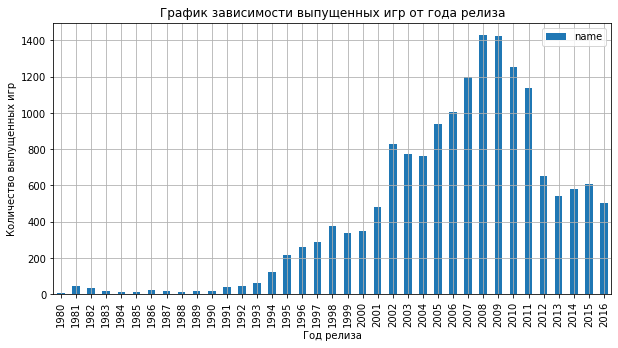

In [42]:
games_year = games.pivot_table(index = "year_of_release", values = "name", aggfunc = "count")
games_year.plot(kind = "bar", figsize = (10, 5), title = "График зависимости выпущенных игр от года релиза", grid = True)
plt.xlabel('Год релиза')
plt.ylabel('Количество выпущенных игр')
plt.show()

**На графике можно выделить несколько важных временных периодов:**
* Первый скачок в 1994 году, когда количество выпущенных игр удвоилось почти в 2 раза. Изучив историю игровой индустрии можно выделить причину данному явлению, а именно появление новых жанров, франшиз и компаний
* Второй скачок в 2002 году, когда наблюдался пик 6 поколения игровых консолей и выход Xbox и GameCube
* Третий скачок в 2008-2009 году, когда вышли многочисленные продолжения к популярным играм: Grand Theft Auto IV, Fallout 3, Metal Gear Solid 4
* После этого количество выпускаемых игр постепенно уменьшалось.



**Пик выпуска игр приходится на 2008-2009 года, когда число достигало около 1400 игр в год. До 1994 года игр выпускалось меньше 100 в год. Из-за малого количества выпускаемых игр можно сказать, что данные за 1980-1994 неважны для общей картины и анализа.**

In [43]:
games_actual = games.query("year_of_release >= 1994")

**Было принято считать, что период после 1994 считать за актуальный.**

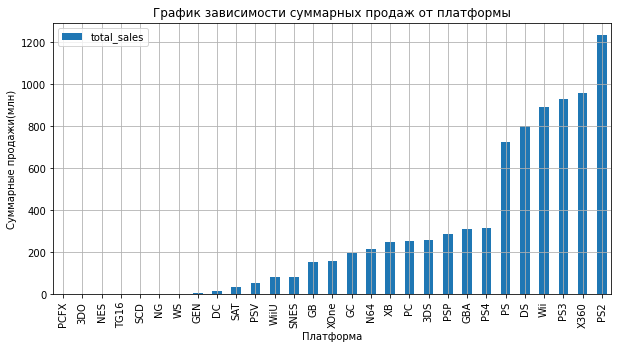

In [44]:
platform_sales = games_actual.pivot_table(index = "platform", values = "total_sales", aggfunc = "sum").sort_values(by = "total_sales")
platform_sales.plot(kind = "bar", figsize = (10, 5), title = "График зависимости cуммарных продаж от платформы", grid = True)
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи(млн)')
plt.show()

На графике видно, что PS2 имеет наибольшие продажи - свыше 1200 миллионов копий. Следом с большим отставанием следуют: X360, PS3, WII, DS и PS. Их продажи составляют от 700 до 960 миллионов проданных копий. Далее с огромным отставанием идет PS4, GBA, PSP, 3DS, PC, XB, N64 и GC с продажами от 200 до 300. 

**Можно выделить платформы с наибольшими суммарными продажами: PS2, X360, PS3, WII, DS и PS. Основной критерий: продажи свыше 600 миллионов копий.**

In [45]:
sales_top = platform_sales.tail(6).sort_values(by = "total_sales", ascending = False)

In [46]:
display(sales_top)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.76
PS,727.58


In [47]:
platform_sales_year = games_actual.loc[games_actual["platform"].isin(sales_top.index)].pivot_table(index = "year_of_release", columns = "platform", values = "total_sales", aggfunc = "sum")

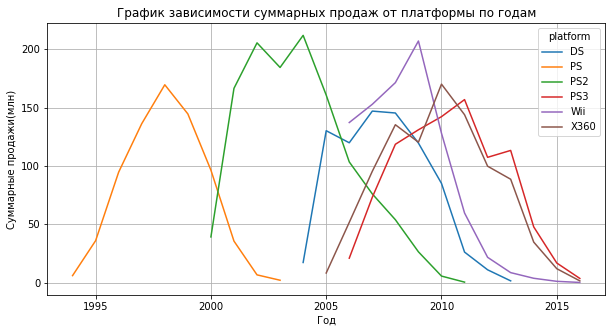

In [48]:
platform_sales_year.plot(kind = "line", figsize = (10, 5), title = "График зависимости cуммарных продаж от платформы по годам", grid = True)
plt.xlabel('Год')
plt.ylabel('Суммарные продажи(млн)')
plt.show()

In [49]:
display(platform_sales_year)

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN
2002,NaN,6.67,205.38,NaN,NaN,NaN


Представленный график предоставляет понимание о том за какой характерный срок появляются новые и исчезают старые платформы. Платформа PS продержалась на рынке около 10 лет. Примерно на 6 год существования данной платформы появилась модель следующего поколения PS2, которая продержалась на рынке также приблизительно 10 лет. Примечательно, что на ее 5-6 год появились PS3, Wii и X360. DS же появилась на 4 год существования PS2, а именно в 2004 году. Все эти платформы просуществовали также около 10 лет, где на графике четко виден спад в районе 2015-2016 года.

**Можно сделать следующие выводы:**
* Средняя продолжительность существования платформы на рынке около 10 лет
* Примерно на начале второй половины существования платформы одного поколения появляются платформы следующего поколения

In [50]:
games_10_years = games_actual.query("year_of_release >= 2006")

**Чтобы определить какие платформы лидируют по продажам, растут или падают важно изучить период последних 10 лет, что составляет среднюю продолжительность платформ на рынке.**

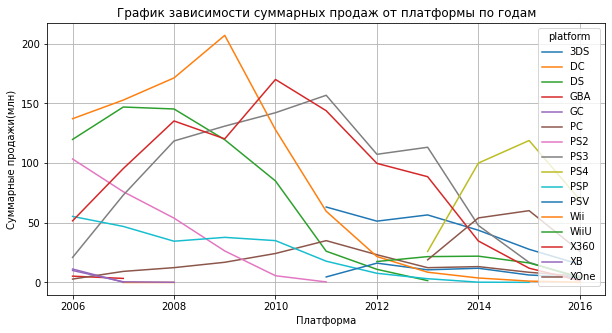

In [51]:
platform_sales_10 = games_10_years.pivot_table(index = "year_of_release", columns = "platform", values = "total_sales", aggfunc = "sum")
platform_sales_10.plot(kind = "line", figsize = (10, 5), title = "График зависимости cуммарных продаж от платформы по годам", grid = True)
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи(млн)')
plt.show()

На графике видно, что подавляющее большинство платформ заканчивают свой срок в 2016 году. Их продажи стремительно падают. Тем не менее, в 2013 вышли PS4 и Xbox One. Принимая во внимание среднюю продолжительность платформ и наличие актуальных платформ на рынке, PS4 и Xbox One являются потенциально прибыльными платформами.

In [52]:
games_recent_years = games_actual.query("year_of_release >= 2013")

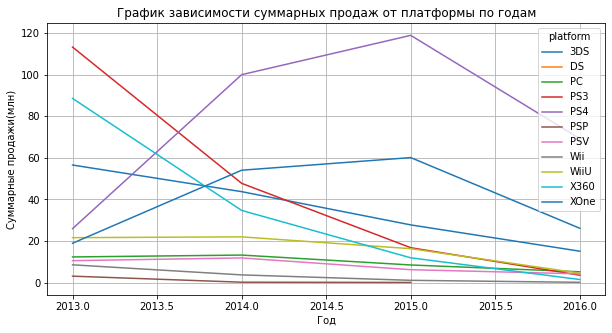

In [53]:
platform_sales_recent = games_recent_years.pivot_table(index = "year_of_release", columns = "platform", values = "total_sales", aggfunc = "sum")
platform_sales_recent.plot(kind = "line", figsize = (10, 5), title = "График зависимости cуммарных продаж от платформы по годам", grid = True)
plt.xlabel('Год')
plt.ylabel('Суммарные продажи(млн)')
plt.show()

**При изучении графика на более близком временном промежутке становится четко видно, что их пик пришелся на 2015 год, но продажи продолжутся вплоть до 2023 года. Также в теории, можно будет инвестировать в следующее поколение платформ, которые выйдут ориентировочно в 2018-2019 году.**

**C этого момента актуальными данными будут считаться данные после 2013 года включительно.**

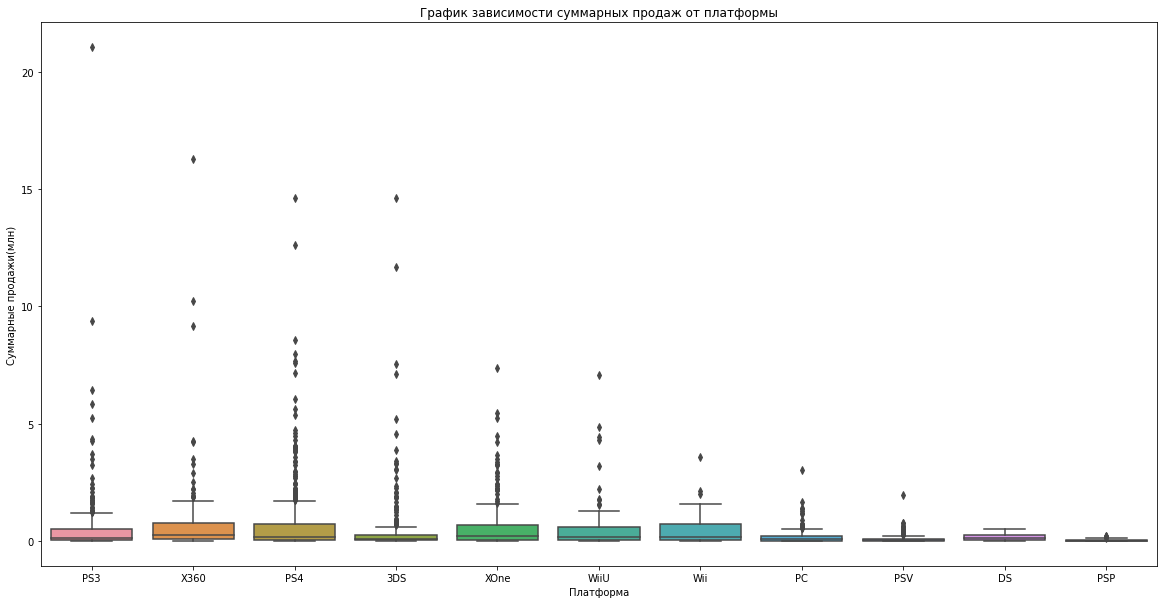

In [54]:
plt.figure(figsize = (20, 10))
sb.boxplot(x = games_recent_years["platform"], y = games_recent_years["total_sales"])
plt.title('График зависимости cуммарных продаж от платформы')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи(млн)')
plt.show()

**На графике видны выбросы всех платформ. Наибольшие суммарные продажи были зафиксированы у PS3. Так как мы взяли самые актуальные данные, то имеет смысл оценить самые актуальные платформы. В целом продажи у PS4 выше, об этом нам говорят "выбросы" у вверхнего уса. Нас интересует, что PS4 в целом успешнее чем Xbox One.**

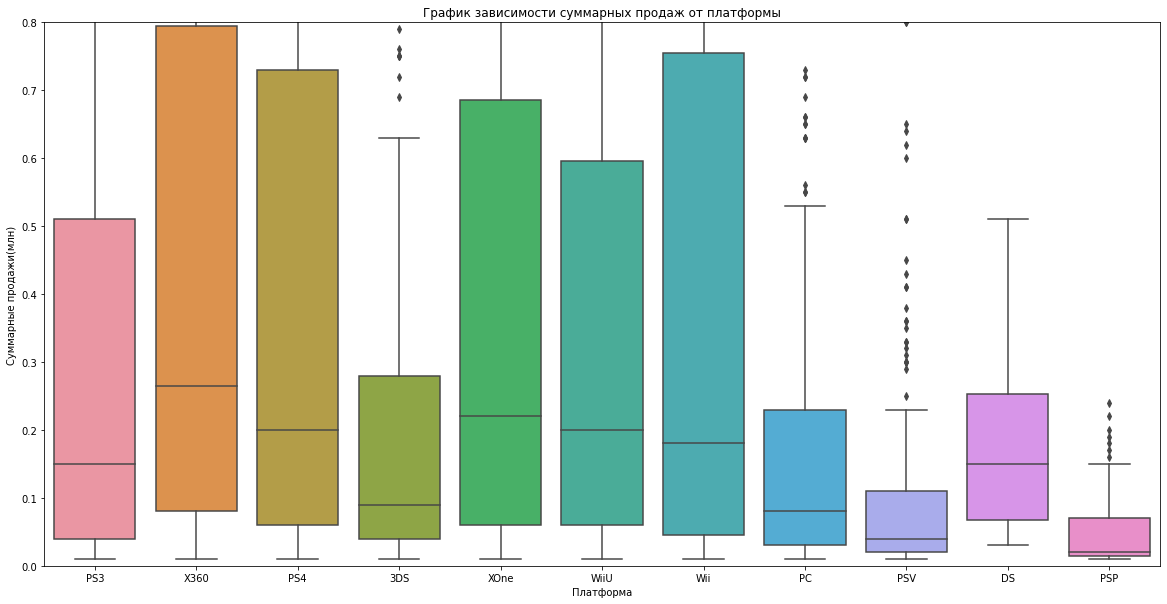

In [55]:
plt.figure(figsize = (20, 10))
plt.ylim(0, 0.8)
sb.boxplot(x = games_recent_years["platform"], y = games_recent_years["total_sales"])
plt.title('График зависимости cуммарных продаж от платформы')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи(млн)')
plt.show()

**Теперь мы можем оценить медианы продаж игровых платформ. Наибольшие средние продажи приходятся на X360. Примечательно, что среднее суммарное продаж у Xbox One выше чем у PS4. Остается неясным вопрос лидерства между PS4 и WiiU. Рассмотрим эти платформы подробнее.**

In [56]:
сheck_platform = games_recent_years.query("platform == 'PS4' or platform == 'WiiU'")

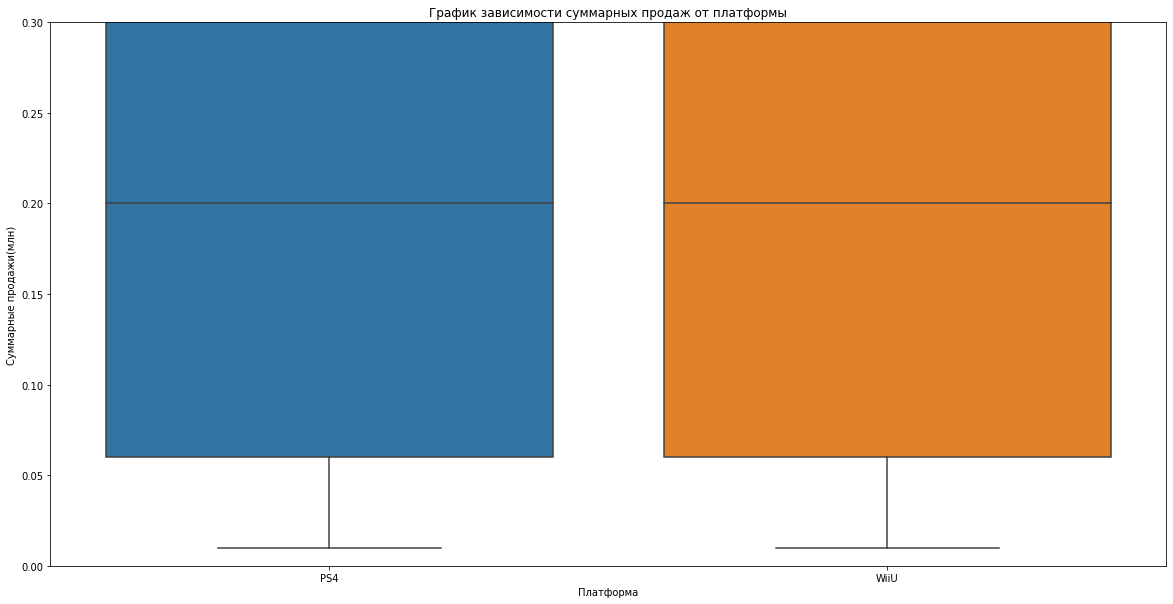

In [57]:
plt.figure(figsize = (20, 10))
plt.ylim(0, 0.3)
sb.boxplot(x = сheck_platform["platform"], y = сheck_platform["total_sales"])
plt.title('График зависимости cуммарных продаж от платформы')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи(млн)')
plt.show()

In [58]:
print(сheck_platform.loc[сheck_platform["platform"] == "PS4", "total_sales"].describe())

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64


In [59]:
print(сheck_platform.loc[сheck_platform["platform"] == "WiiU", "total_sales"].describe())

count    115.000000
mean       0.562000
std        1.038778
min        0.010000
25%        0.060000
50%        0.200000
75%        0.595000
max        7.090000
Name: total_sales, dtype: float64


**Теперь можно сказать, что средние продаж у этих платформ одинаковые**

In [60]:
platform_ps4 = games_recent_years.query("platform == 'PS4' and user_score != 101 and critic_score != 101")

Для изучения вопроса влияния отзывов пользователей и критиков на продажи внутри одной платформы была выбрана PS4, так как она является самой актуальной платформой с наибольшими продажами.

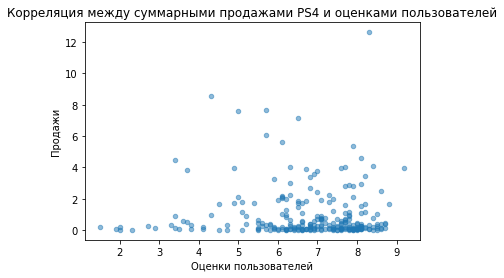

In [61]:
platform_ps4.plot(kind = "scatter", x = "user_score", y = "total_sales", title = "Корреляция между суммарными продажами PS4 и оценками пользователей", alpha = 0.5)
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи')
plt.show()

In [62]:
platform_ps4['total_sales'].corr(platform_ps4['user_score'])

-0.03362497596528878

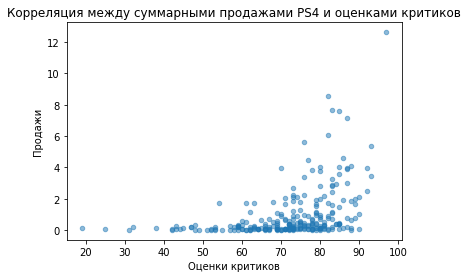

In [63]:
platform_ps4.plot(kind = "scatter", x = "critic_score", y = "total_sales", title = "Корреляция между суммарными продажами PS4 и оценками критиков", alpha = 0.5)
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')
plt.show()


In [64]:
platform_ps4['total_sales'].corr(platform_ps4['critic_score'])

0.40589480145836687

**Можно сделать вывод, что между оценками критиков и суммарными продажами прослеживается положительная динамика, а в случае с оценками пользователей коэффициент граничит между отрицательной и нейтральной чертой с показателем -0.03. В целом видно, что игроки доверяют больше оценками критиков. В случае критиков существует реальная закономерность, но у пользователей присутствуют случаи огромных продаж, когда рейтинги относительно низкие.**

In [65]:
platform_xone = games_recent_years.query("platform == 'XOne' and user_score != 101 and critic_score != 101")

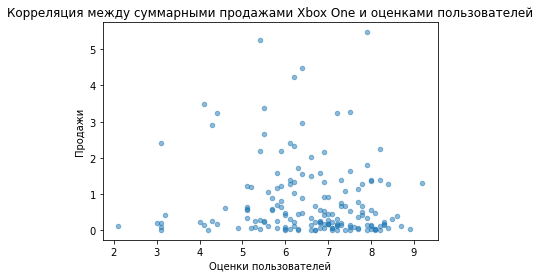

In [66]:
platform_xone.plot(kind = "scatter", x = "user_score", y = "total_sales", title = "Корреляция между суммарными продажами Xbox One и оценками пользователей", alpha = 0.5)
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи')
plt.show()

In [67]:
platform_xone['total_sales'].corr(platform_xone['user_score'])

-0.09400318326920852

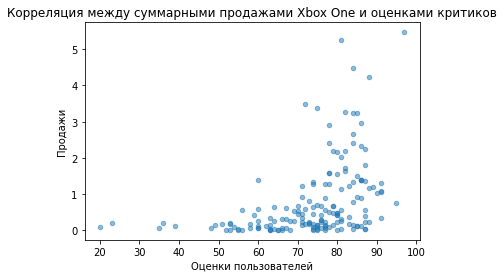

In [68]:
platform_xone.plot(kind = "scatter", x = "critic_score", y = "total_sales", title = "Корреляция между суммарными продажами Xbox One и оценками критиков", alpha = 0.5)
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи')
plt.show()

In [69]:
platform_xone['total_sales'].corr(platform_xone['critic_score'])

0.4104220356129637

In [70]:
platform_x360 = games_recent_years.query("platform == 'X360' and user_score != 101 and critic_score != 101")

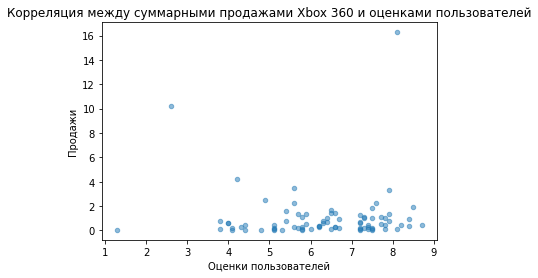

In [71]:
platform_x360.plot(kind = "scatter", x = "user_score", y = "total_sales", title = "Корреляция между суммарными продажами Xbox 360 и оценками пользователей", alpha = 0.5)
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи')
plt.show()

In [72]:
platform_x360['total_sales'].corr(platform_x360['user_score'])

-0.006238179532306317

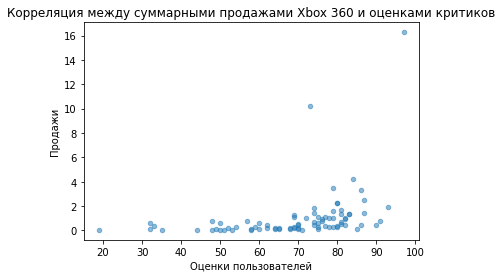

In [73]:
platform_x360.plot(kind = "scatter", x = "critic_score", y = "total_sales", title = "Корреляция между суммарными продажами Xbox 360 и оценками критиков", alpha = 0.5)
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи')
plt.show()

In [74]:
platform_x360['total_sales'].corr(platform_x360['critic_score'])

0.3503445460228664

**Оценив корреляцию у других платформ(Xbox One, Xbox 360) можно сделать вывод, что тенденция повторяется. С отзывами критиков положительная корреляция, а с пользователями отрицательная. В случае Xbox One, где данных больше - видно, что пользователи ставят оценки близкие к рандому, которые не коррелируются с суммарными продажами.**

In [75]:
games_genre = games_recent_years.pivot_table(index = "genre", values = "name", aggfunc = "count").sort_values(by="name")

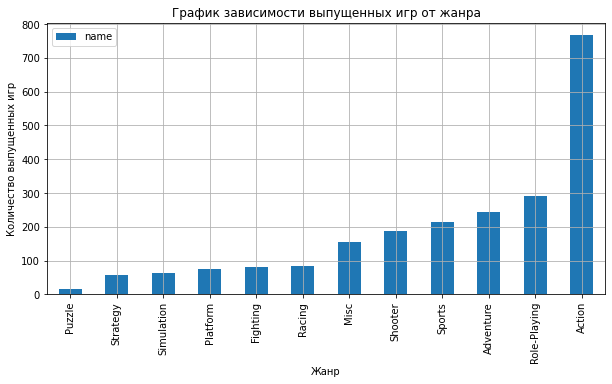

In [76]:
games_genre.plot(kind = "bar", figsize = (10, 5), title = "График зависимости выпущенных игр от жанра", grid = True )
plt.xlabel('Жанр')
plt.ylabel('Количество выпущенных игр')
plt.show()

**Самыми популярными жанрами являются: Action, Role-Playing, Adventure. Cамыми непопулярными считаются: Puzzle, Strategy, Simulation.**

In [77]:
games_genre_sales = games_recent_years.pivot_table(index = "genre", values = "total_sales", aggfunc = "sum").sort_values(by="total_sales")

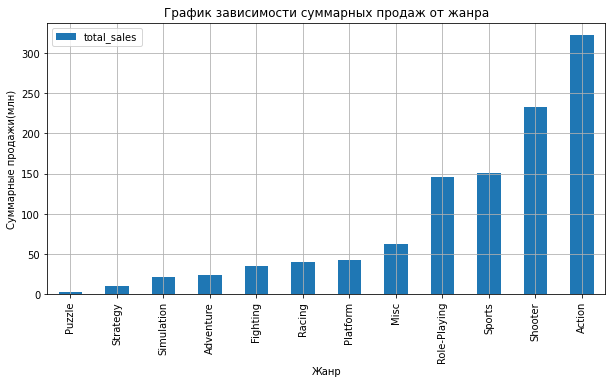

In [78]:
games_genre_sales.plot(kind = "bar", figsize = (10, 5), title = "График зависимости суммарных продаж от жанра", grid = True )
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи(млн)')
plt.show()

**Если рассматривать суммарные продажи, то больше всего продаж имеют следующие жанры: Action, Shooter, Sports. Меньше всего продаж имеют: Puzzle, Strategy, Simulation**

In [79]:
games_genre_sales_med = games_recent_years.pivot_table(index = "genre", values = "total_sales").sort_values(by="total_sales")

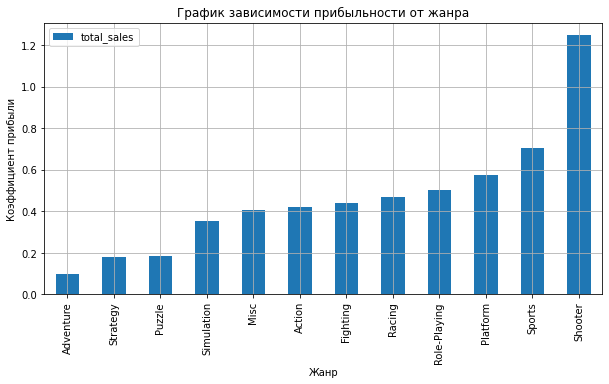

In [80]:
games_genre_sales_med.plot(kind = "bar", figsize = (10, 5), title = "График зависимости прибыльности от жанра", grid = True )
plt.xlabel('Жанр')
plt.ylabel('Коэффициент прибыли')
plt.show()

Примечательно, что несмотря на лидерство жанра action по суммарным продажам и количеству выпущенным играм, по прибыли этот жанр занимает только 7 место. Самым прибыльным же жанром считается shooter, который был на 5 месте по количеству игр и на 2 по суммарным продажам. Несмотря на то, что adventure на 3 месте по количеству, этот жанр находится на последнем месте по прибыли. У последних мест по продажам ситуация по прибыли сильно не изменилась.

**Самые прибыльные жанры:**
* Shooter
* Sports
* Platform
* Role-Playing
* Fighting

**Итоги по исследовательскому анализу данных:**
* Пик выпуска игр приходится на 2008-2009 года, когда число достигало около 1400 игр в год. До 1994 года игр выпускалось меньше 100 в год
* Платформы с наибольшими суммарными продажами: PS2, X360, PS3, WII, DS и PS
* Средняя продолжительность существования платформы на рынке около 10 лет
* Примерно на начале второй половины существования платформы одного поколения появляются платформы следующего поколения
* Принимая во внимание среднюю продолжительность платформ и наличие актуальных платформ на рынке, PS4 и Xbox One являются потенциально прибыльными платформами.
* Также в теории, можно будет инвестировать в следующее поколение платформ, которые выйдут ориентировочно в 2018-2019 году
*  В целом продажи у PS4 выше. Тем не менее, среднее суммарное продаж у Xbox One выше чем у PS4
* С отзывами критиков присутствует положительная корреляция, а с пользователями отрицательная. 
* Игроки доверяют больше оценками критиков. В случае критиков существует реальная закономерность, но у пользователей присутствуют случаи огромных продаж, когда рейтинги относительно низкие.
* Самыми популярными жанрами являются: Action, Role-Playing, Adventure. Cамыми непопулярными считаются: Puzzle, Strategy, Simulation.
* Если рассматривать суммарные продажи, то больше всего продаж имеют следующие жанры: Action, Shooter, Sports. Меньше всего продаж имеют: Puzzle, Strategy, Simulation
* Самые прибыльные жанры: Shooter, Sports, Platform, Role-Playing, Fighting


#### Шаг 4. Портрет пользователя каждого региона

**Самые популярные платформы**


In [81]:
def platform_sales(name):
    platform_top5 = games_recent_years.pivot_table(index = "platform", values = name, aggfunc = "sum").sort_values(by=name, ascending = False).head(5)
    plt.pie(platform_top5[name], labels=platform_top5.index, autopct = '%.1f%%')
    plt.show()

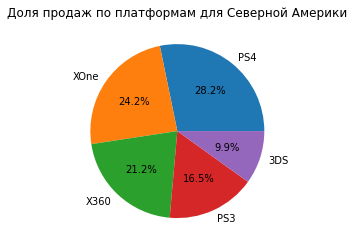

In [82]:
plt.title("Доля продаж по платформам для Северной Америки")
platform_sales("na_sales")

**В Северной Америке наибольшая доля продаж приходится на следующие платформы: PS4, Xbox One и Xbox 360. Примечательно, что доля PS4 ровно на 4% больше чем у Xbox One, который больше на 3% чем Xbox 360**

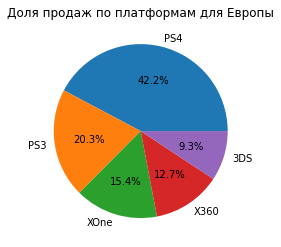

In [83]:
plt.title("Доля продаж по платформам для Европы")
platform_sales("eu_sales")

**В Европе наибольшая доля продаж приходится на следующие платформы: PS4, PS3 и Xbox One. C большим отрывом PS4 имеет долю, равную 42.2%. Остальные платформы по 20.3% и 15.4% соответственно.**

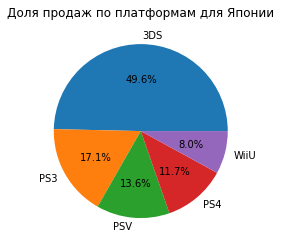

In [84]:
plt.title("Доля продаж по платформам для Японии")
platform_sales("jp_sales")

**В Японии наибольшая доля продаж приходится на следующие платформы: 3DS, PS3 и PSV. C большим отрывом 3DS имеет долю, равную 49.6%. Остальные платформы по 17.1% и 13.6% соответственно. Интересно, что в Японии ни одна из актуальных платформ из нового поколения не находится в топе 3.**

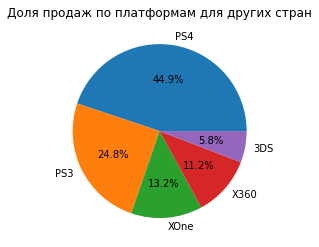

In [85]:
plt.title("Доля продаж по платформам для других стран")
platform_sales("other_sales")

**В остальном мире наибольшая доля продаж приходится на следующие платформы: PS4, PS3 и Xbox One. C большим отрывом PS4 имеет долю, равную 44.9%. Остальные платформы по 24.8% и 13.2% соответственно. Доля продаж по платформам в Европе и в остальном мире совпадает по топ 5. Портреты пользователей совпадают.**

**Самые популярные жанры**


In [86]:
def genre_sales(name):
    genre_top5 = games_recent_years.pivot_table(index = "genre", values = name, aggfunc = "sum").sort_values(by=name, ascending = False).head(5)
    plt.pie(genre_top5[name], labels=genre_top5.index, autopct = '%.1f%%')
    plt.show()

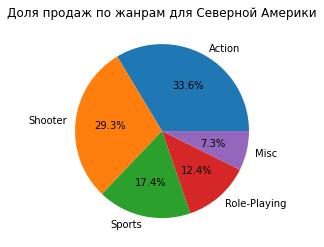

In [87]:
plt.title("Доля продаж по жанрам для Северной Америки")
genre_sales("na_sales")

**В Северной Америке наибольшая доля продаж приходится на следующие жанры: Action, Shooter и Sports**

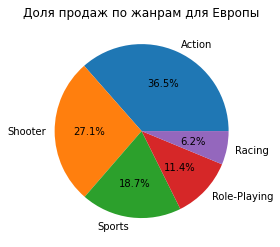

In [88]:
plt.title("Доля продаж по жанрам для Европы")
genre_sales("eu_sales")

**В Европе наибольшая доля продаж приходится на следующие жанры: Action, Shooter и Sports. Доля продаж по жанрам совпадает с Северной Америкой, отличается только топ5.**

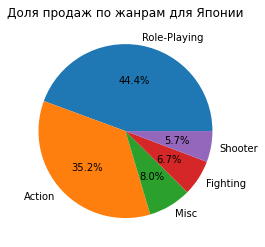

In [89]:
plt.title("Доля продаж по жанрам для Японии")
genre_sales("jp_sales")

**Япония опять отличилась, где наибольшая доля продаж приходится на следующие жанры: Role-playing, Action, Misc. Видно, что игрок из японского сегмента имеет вкус, сильно отличающийся от остального мира.**

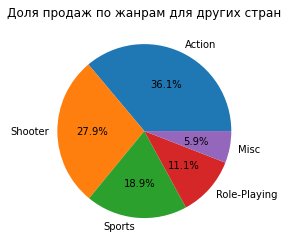

In [90]:
plt.title("Доля продаж по жанрам для других стран")
genre_sales("other_sales")

**В других странах топ3 жанров такие же как в Северной Америке и Европе. Большинство игроков в мире предпочитают одни и теже жанры.**

**Влияние рейтинга**


In [91]:
def rating_sales(name):
    rating = games_recent_years.pivot_table(index = "rating", values = name, aggfunc = "sum").sort_values(by=name, ascending = False).head(5)
    plt.pie(rating[name], labels=rating.index, autopct = '%.1f%%')
    plt.show()

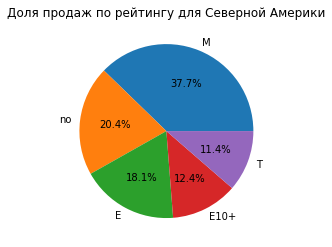

In [92]:
plt.title("Доля продаж по рейтингу для Северной Америки")
rating_sales("na_sales")

**В Северной Америке наибольшая доля продаж приходится на следующие категории рейтинга ESRB: M, E, E10+. В топ2 находится заглушка, поэтому в учет не берется. В дальнейшем также. На первом месте находится взрослый рейтинг, а на 2 и 3 местах: для всех и для всех 10+**

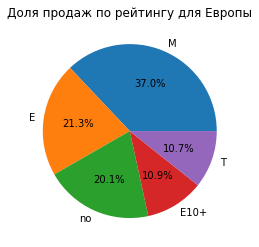

In [93]:
plt.title("Доля продаж по рейтингу для Европы")
rating_sales("eu_sales")

**В Европе наибольшая доля продаж приходится на следующие категории рейтинга ESRB: M, E, E10+. В Европе доля продаж совпадает с Северной Америке с приблизительно одинаковыми долями**

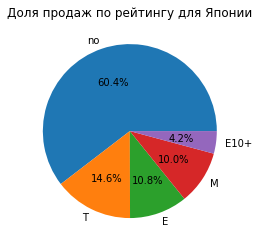

In [94]:
plt.title("Доля продаж по рейтингу для Японии")
rating_sales("jp_sales")

**В Японии наибольшая доля продаж приходится на следующие категории рейтинга ESRB: T, E, M. Cитуация опять отличается только у Японии, где преобладает рейтинг teen.**

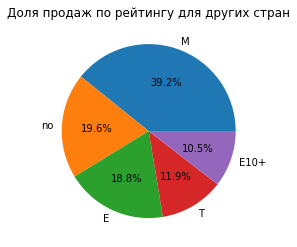

In [95]:
plt.title("Доля продаж по рейтингу для других стран")
rating_sales("other_sales")

**В других странах наибольшая доля продаж приходится на следующие категории рейтинга ESRB: M, E, T. Ситуация такая же как с другими регионами, в отличии от Японии. Поменялись только 3 и 4 место.**

**В целом можно сделать вывод, что портрет пользователя каждого региона совпадает, исключая Японию. Игроки из Японии имеют другие предпочтения по всем категориям. Единственное различие, которое можно выделить среди других регионов - выбор платформы, но разница незначительна, так как в Европе и других странах предпочтения совпадают.**

**Портрет пользователя из Северной Америки:**
* Платформа: PS4, Xbox One и Xbox 360
* Жанр: Action, Shooter и Sports
* Рейтинг: M, E, E10+

**Портрет пользователя из Европы:**
* Платформа: PS4, PS3 и Xbox One
* Жанр: Action, Shooter и Sports
* Рейтинг: M, E, E10+

**Портрет пользователя из Японии:**
* Платформа: 3DS, PS3 и PSV
* Жанр:  Role-playing, Action, Misc
* Рейтинг: T, E, M

**Портрет пользователя из остальных стран:**
* Платформа: PS4, PS3 и Xbox One
* Жанр: Action, Shooter и Sports
* Рейтинг: M, E, T

#### Шаг 5. Проверка гипотез

**Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

* Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [96]:
platform_pc = games_recent_years.query("platform == 'PC' and user_score != 101")["user_score"]
platform_xone = games_recent_years.query("platform == 'XOne' and user_score != 101")["user_score"]

Для проверки гипотез будет использован двусторониий t-test для двух выборок.

In [97]:
alpha = 0.05
results = st.ttest_ind(platform_pc, platform_xone) 

print("p value:", results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p value: 0.14012658403611647
Не отвергаем нулевую гипотезу


**По результатам проверки мы не можем отвергнуть нулевую гипотезу и утверждать, что средние пользовательские рейтинги платформ Xbox One и PC разные.**

In [98]:
print(platform_pc.mean())
print(platform_xone.mean())

6.2696774193548395
6.521428571428572


Проверка на средние рейтинги.

**Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.**

* Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны
* Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные

In [99]:
games_action = games_recent_years.query("(genre == 'Action') and (user_score != 101)")["user_score"]
games_sports = games_recent_years.query("(genre == 'Sports') and (user_score != 101)")["user_score"]

Для проверки гипотез будет использован двусторониий t-test для двух выборок.

In [100]:
alpha = 0.05
results = st.ttest_ind(games_action, games_sports) 

print("p value:", results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p value: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


**По результатам теста мы отвергаем нулевую гипотезу в пользу альтернативной. Средние пользовательские рейтинги жанров Action и Sports разные**

In [101]:
print(games_action.mean())
print(games_sports.mean())

6.837532133676092
5.238124999999999


Действительно разные

**Итог по проверке гипотез:**
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Средние пользовательские рейтинги жанров Action и Sports разные

#### Шаг 6. Вывод

**Итоги по предобработке данных:**
* Названия столбцов были приведены в корректный формат(змеиный регистр)
* Пропуски в name и genre были удалены
* В столбце данных user_score были найдены значения tbd, которые были заменены на nan
* Пропуски в user_score и сritic_score было решено оставить и заменить заглушкой 101
* Пропуски в rating были заменены заглушкой "no"
* Были заменены типы данных у year_of_release, сritic_score и user_score
* Были устранены неявные дубликаты данных
* Был добавлен столбец об общих продажах

**Итоги по исследовательскому анализу данных:**
* Пик выпуска игр приходится на 2008-2009 года, когда число достигало около 1400 игр в год. До 1994 года игр выпускалось меньше 100 в год
* Платформы с наибольшими суммарными продажами: PS2, X360, PS3, WII, DS и PS
* Средняя продолжительность существования платформы на рынке около 10 лет
* Примерно на начале второй половины существования платформы одного поколения появляются платформы следующего поколения
* Принимая во внимание среднюю продолжительность платформ и наличие актуальных платформ на рынке, PS4 и Xbox One являются потенциально прибыльными платформами.
* Также в теории, можно будет инвестировать в следующее поколение платформ, которые выйдут ориентировочно в 2018-2019 году
*  В целом продажи у PS4 выше. Тем не менее, среднее суммарное продаж у Xbox One выше чем у PS4
* С отзывами критиков присутствует положительная корреляция, а с пользователями отрицательная. 
* Игроки доверяют больше оценками критиков. В случае критиков существует реальная закономерность, но у пользователей присутствуют случаи огромных продаж, когда рейтинги относительно низкие.
* Самыми популярными жанрами являются: Action, Role-Playing, Adventure. Cамыми непопулярными считаются: Puzzle, Strategy, Simulation.
* Если рассматривать суммарные продажи, то больше всего продаж имеют следующие жанры: Action, Shooter, Sports. Меньше всего продаж имеют: Puzzle, Strategy, Simulation
* Самые прибыльные жанры: Shooter, Sports, Platform, Role-Playing, Fighting

**В целом можно сделать вывод, что портрет пользователя каждого региона совпадает, исключая Японию. Игроки из Японии имеют другие предпочтения по всем категориям. Единственное различие, которое можно выделить среди других регионов - выбор платформы, но разница незначительна, так как в Европе и других странах предпочтения совпадают.**

**Портрет пользователя из Северной Америки:**
* Платформа: PS4, Xbox One и Xbox 360
* Жанр: Action, Shooter и Sports
* Рейтинг: M, E, E10+

**Портрет пользователя из Европы:**
* Платформа: PS4, PS3 и Xbox One
* Жанр: Action, Shooter и Sports
* Рейтинг: M, E, E10+

**Портрет пользователя из Японии:**
* Платформа: 3DS, PS3 и PSV
* Жанр:  Role-playing, Action, Misc
* Рейтинг: T, E, M

**Портрет пользователя из остальных стран:**
* Платформа: PS4, PS3 и Xbox One
* Жанр: Action, Shooter и Sports
* Рейтинг: M, E, T

**Итог по проверке гипотез:**
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Средние пользовательские рейтинги жанров Action и Sports разные

**Рекомендации к компании:**
* Наиболее привлекательные и прибыльные платформы: PS4 и Xbox One. В Европе, Северной Америке и в остальных странах(кроме Японии) данные платформы расположились в топ3 по долям продаж, а PS4 стабильно на 1 месте. Рекомендуем сделать наибольший акцент именно на платформу PS4

* Наиболее привлекательные и прибыльные жанры: Shooter, Sports, Platform, Role-Playing. Тем не менее, во всех регионах кроме Японии наибольшая доля продаж приходятся на Action, Shooter и Sports. Рекомендуем сделать наибольший акцент на Shooter и Sports. На японский рынок Role-Playing же является самым лучшим решением. 
* Наиболее привлекательные рейтинги: M и Е. Во всех регионах данные рейтинги присутствуют в топ3.
* Нужно обращать внимание на отзывы критиков, существует положительная корреляция между ними и суммарными продажами. В случае оценок пользователей мы имеет отрицательную корреляцию.

**Если проссумировать, то надо акцентировать внимание на платформу PS4 и Xbox One, с жанрами Shooter и Sports, рейтингом M и Е и обращать внимание на оценки критиков. Данная рекомендация будет работать во всем мире кроме Японии. Но думаю стоит уделить рекламный бюджет именно на данный сегмент.**